## Import Dependencies

In [73]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

## Data Retrieval

In [74]:
# Create path for csv files
train_2_path = "TrainingData/Train2_20W_20000.csv"
train_3_path = "TrainingData/Train3_5W_20000.csv"
train_4_path = "TrainingData/Train4_10W_22000.csv"

# Read the data 
train_2 = pd.read_csv(train_2_path, header=None)
train_3 = pd.read_csv(train_3_path, header=None)
train_4 = pd.read_csv(train_4_path, header=None)

## Data Cleaning

In [75]:
# Pull out only the rows with 'IO' start
# Training Data 2
train_2.columns = ['Information']

train_2 = pd.Series(train_2['Information'])
train_2 = train_2.replace("loss=","")
train_2 = train_2.loc[train_2.str.startswith("I0")]

# Training Data 3
train_3.columns = ['Information']

train_3 = pd.Series(train_3['Information'])
train_3 = train_3.replace("loss=","")
train_3 = train_3.loc[train_3.str.startswith("I0")]

# Training Data 4
train_4.columns = ['Information']

train_4 = pd.Series(train_4['Information'])
train_4 = train_4.replace("loss=","")
train_4 = train_4.loc[train_4.str.startswith("I0")]

## Data Visualization

### Model - Trained with 20 Words

In [76]:
# Split the data and placed in dataframe
data2 = train_2.str.split(expand = True)
data_df_2 = pd.DataFrame(data2)

# Set the column names
data_df_2.columns = ['Input/Output',
                  'Timestamp',
                  'Model Number',
                  'Model Type',
                  'Step Label',
                  'Step Number',
                  'Per-Step Label',
                  'Time Label',
                  'Seconds to Run',
                  'Loss']
# Split "loss" from the value given in the same cell
data_df_2['Loss'].replace("loss=", "", regex=True, inplace=True)

# Changed data type for plotting
data_df_2['Loss'] = data_df_2['Loss'].astype(str).astype(float)
data_df_2

,Input/Output,Timestamp,Model Number,Model Type,Step Label,Step Number,Per-Step Label,Time Label,Seconds to Run,Loss
1,I0223,15:48:24.178905,10080,model_lib_v2.py:659],Step,100,per-step,time,0.971s,1.497
3,I0223,15:50:01.787173,10080,model_lib_v2.py:659],Step,200,per-step,time,1.029s,1.025
5,I0223,15:51:40.671456,10080,model_lib_v2.py:659],Step,300,per-step,time,0.992s,0.882
7,I0223,15:53:21.444101,10080,model_lib_v2.py:659],Step,400,per-step,time,1.051s,0.810
9,I0223,15:55:00.188306,10080,model_lib_v2.py:659],Step,500,per-step,time,1.058s,0.844
...,...,...,...,...,...,...,...,...,...,...
391,I0221,05:04:08.817089,720,model_lib_v2.py:659],Step,19600,per-step,time,1.069s,0.261
393,I0221,05:05:54.290795,720,model_lib_v2.py:659],Step,19700,per-step,time,1.049s,0.217
395,I0221,05:07:39.208438,720,model_lib_v2.py:659],Step,19800,per-step,time,1.043s,0.206
397,I0221,05:09:23.764986,720,model_lib_v2.py:659],Step,19900,per-step,time,1.059s,0.320


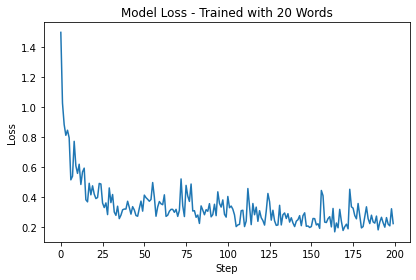

In [82]:
# Plot the model for "Trained with 20 Words"
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Model Loss - Trained with 20 Words')
plt.tight_layout()
plt.plot(list(range(len(data_df_2['Loss']))), data_df_2['Loss'])
plt.savefig("PlotImages/Train2_20W_20000.png")
plt.show()

### Model - Trained with 5 Words

In [78]:
# Split the data and placed in dataframe
data3 = train_3.str.split(expand = True)
data_df_3 = pd.DataFrame(data3)

# Set the column names
data_df_3.columns = ['Input/Output',
                  'Timestamp',
                  'Model Number',
                  'Model Type',
                  'Step Label',
                  'Step Number',
                  'Per-Step Label',
                  'Time Label',
                  'Seconds to Run',
                  'Loss']
# Split "loss" from the value given in the same cell
data_df_3['Loss'].replace("loss=", "", regex=True, inplace=True)

# Changed data type for plotting
data_df_3['Loss'] = data_df_3['Loss'].astype(str).astype(float)
data_df_3

,Input/Output,Timestamp,Model Number,Model Type,Step Label,Step Number,Per-Step Label,Time Label,Seconds to Run,Loss
1,I0223,07:41:54.934097,13988,model_lib_v2.py:659],Step,100,per-step,time,0.952s,0.866
3,I0223,07:43:30.481254,13988,model_lib_v2.py:659],Step,200,per-step,time,0.933s,0.879
5,I0223,07:45:05.194752,13988,model_lib_v2.py:659],Step,300,per-step,time,0.925s,0.622
7,I0223,07:46:40.606730,13988,model_lib_v2.py:659],Step,400,per-step,time,0.932s,0.847
9,I0223,07:48:14.922438,13988,model_lib_v2.py:659],Step,500,per-step,time,0.933s,0.614
...,...,...,...,...,...,...,...,...,...,...
393,I0223,06:57:23.129191,7900,model_lib_v2.py:659],Step,19700,per-step,time,1.044s,0.192
395,I0223,06:59:07.820758,7900,model_lib_v2.py:659],Step,19800,per-step,time,1.007s,0.171
396,I0223,06:59:07.820758,7900,model_lib_v2.py:659],Step,19800,per-step,time,1.007s,0.171
398,I0223,07:00:52.152835,7900,model_lib_v2.py:659],Step,19900,per-step,time,1.043s,0.132


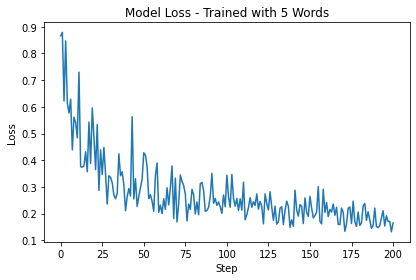

In [83]:
# Plot the model for "Trained with 5 Words"
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Model Loss - Trained with 5 Words')
plt.tight_layout()
plt.plot(list(range(len(data_df_3['Loss']))), data_df_3['Loss'])
plt.savefig("PlotImages/Train3_5W_20000.png")
plt.show()

### Model - Trained with 10 Words

In [80]:
# Split the data and placed in dataframe
data4 = train_4.str.split(expand = True)
data_df_4 = pd.DataFrame(data4)

# Set the column names
data_df_4.columns = ['Input/Output',
                  'Timestamp',
                  'Model Number',
                  'Model Type',
                  'Step Label',
                  'Step Number',
                  'Per-Step Label',
                  'Time Label',
                  'Seconds to Run',
                  'Loss']
# Split "loss" from the value given in the same cell
data_df_4['Loss'].replace("loss=", "", regex=True, inplace=True)

# Changed data type for plotting
data_df_4['Loss'] = data_df_4['Loss'].astype(str).astype(float)
data_df_4

,Input/Output,Timestamp,Model Number,Model Type,Step Label,Step Number,Per-Step Label,Time Label,Seconds to Run,Loss
1,I0223,09:26:21.701446,5912,model_lib_v2.py:659],Step,100,per-step,time,0.973s,1.185
3,I0223,09:27:57.195238,5912,model_lib_v2.py:659],Step,200,per-step,time,0.962s,1.075
5,I0223,09:29:34.698737,5912,model_lib_v2.py:659],Step,300,per-step,time,0.963s,0.949
7,I0223,09:31:12.243800,5912,model_lib_v2.py:659],Step,400,per-step,time,0.957s,0.734
9,I0223,09:32:50.488417,5912,model_lib_v2.py:659],Step,500,per-step,time,0.992s,0.686
...,...,...,...,...,...,...,...,...,...,...
431,I0223,15:27:21.540153,5912,model_lib_v2.py:659],Step,21600,per-step,time,1.039s,0.208
433,I0223,15:29:06.914421,5912,model_lib_v2.py:659],Step,21700,per-step,time,1.278s,0.155
435,I0223,15:30:58.670386,5912,model_lib_v2.py:659],Step,21800,per-step,time,1.148s,0.196
437,I0223,15:32:54.977452,5912,model_lib_v2.py:659],Step,21900,per-step,time,1.139s,0.189


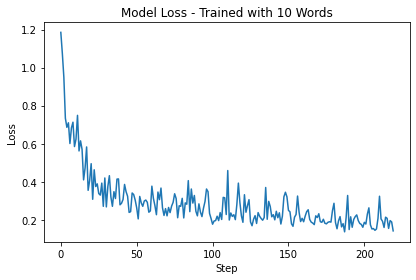

In [84]:
# Plot the model for "Trained with 10 Words"
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Model Loss - Trained with 10 Words')
plt.tight_layout()
plt.plot(list(range(len(data_df_4['Loss']))), data_df_4['Loss'])
plt.savefig("PlotImages/Train4_10W_22000.png")
plt.show()